# AIML MODULE PROJECT - Meghna

## Neural Networks

---

### Part A

---

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

2024-02-25 20:33:58.806472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read the data
data = pd.read_csv('/Users/meghnarana/Downloads/NN Project Data - Signal.csv')

# Display the first few rows of the DataFrame to verify the data is loaded correctly
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate percentage of missing values for each attribute
percentage_missing = (missing_values / len(data)) * 100

# Print percentage of missing values for each attribute
print("Percentage of missing values for each attribute:")
print(percentage_missing)

Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [4]:
# Check for duplicate records
duplicate_records = data.duplicated()

# Print the number of duplicate records
print("Number of duplicate records:", duplicate_records.sum())

Number of duplicate records: 240


In [5]:
# Drop duplicate records
data.drop_duplicates(inplace=True)

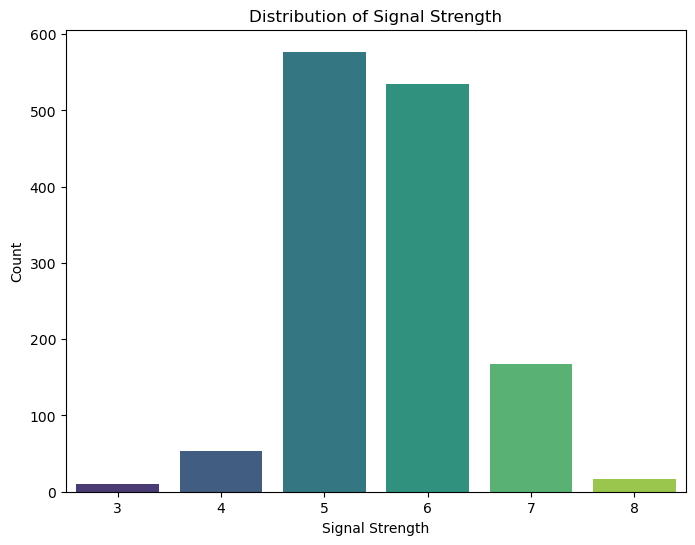

In [6]:
# Visualize the distribution of the target variable 'Signal_Strength'
plt.figure(figsize=(8, 6))
sns.countplot(x='Signal_Strength', data=data, palette='viridis')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.show()

From the initial data analysis of the 'Signals.csv' dataset, we can derive the following insights:

No missing values: The dataset does not contain any missing values in any of the attributes, as indicated by the absence of missing percentage values for each attribute. This suggests that the dataset is complete and does not require imputation for missing values.

Target variable distribution: The distribution of the target variable 'Signal_Strength' shows that certain signal strengths occur more frequently than others. This could imply that the dataset might be imbalanced, with some classes having more instances than others. Understanding this distribution is crucial for modeling, as it may impact the performance of machine learning algorithms, especially in classification tasks.

In [7]:
# Check the number of unique classes in the target variable
data['Signal_Strength'].nunique()

6

In [8]:
# Split the data into features (X) and target variable (Y)
X = data.drop(columns=['Signal_Strength'])  # Features
Y = data['Signal_Strength']  # Target variable

In [9]:
# Split the data into train and test sets with a 70:30 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
# Print the shape of all four variables
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data is in sync
train_sync = len(X_train) == len(Y_train)
test_sync = len(X_test) == len(Y_test)

print("\nTrain and test data are in sync:")
print("X_train and Y_train:", train_sync)
print("X_test and Y_test:", test_sync)

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)

Train and test data are in sync:
X_train and Y_train: True
X_test and Y_test: True


In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Convert the categorical labels into one-hot encoded format
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [13]:
# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add dropout regularization for the first hidden layer
model.add(Dropout(0.2))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=Y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 9)                 297       
                                                                 
Total params: 3145 (12.29 KB)
Trainable params: 3145 (12.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Train the classifier
history = model.fit(X_train_scaled, Y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))

Epoch 1/10
30/30 [==============================] - 1s 11ms/step - loss: 1.9404 - accuracy: 0.3134 - val_loss: 1.5817 - val_accuracy: 0.4877
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 1.4413 - accuracy: 0.4984 - val_loss: 1.2735 - val_accuracy: 0.5735
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 1.2448 - accuracy: 0.5321 - val_loss: 1.1516 - val_accuracy: 0.5760
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 1.1512 - accuracy: 0.5521 - val_loss: 1.0927 - val_accuracy: 0.5907
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 1.1101 - accuracy: 0.5762 - val_loss: 1.0550 - val_accuracy: 0.6176
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.5878 - val_loss: 1.0281 - val_accuracy: 0.6201
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 1.0594 - accuracy: 0.5783 - val_loss: 1.0141 - val_accuracy: 0.6176
Epoch 8/10
30/30 [=

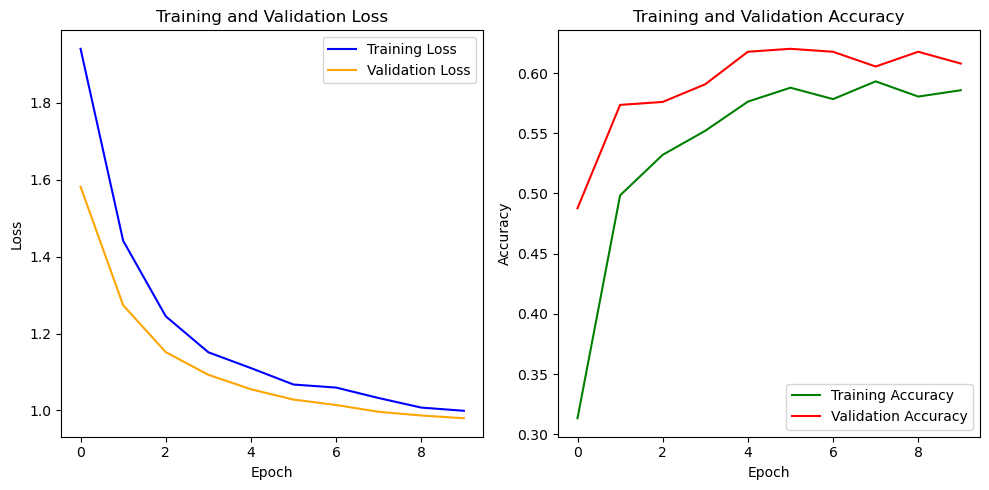

In [15]:
# Get training loss and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get training accuracy and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training loss and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy', color='green')
plt.plot(validation_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout regularization

# Add batch normalization layer
model.add(BatchNormalization())

# Add second hidden layer
model.add(Dense(units=64, activation='relu'))

# Add third hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=Y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 9)                 297       
                                                      

In [17]:
# Train the updated classifier
history_updated = model.fit(X_train_scaled, Y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))

Epoch 1/10
30/30 [==============================] - 2s 10ms/step - loss: 1.6728 - accuracy: 0.4217 - val_loss: 1.7293 - val_accuracy: 0.5466
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 1.1347 - accuracy: 0.5468 - val_loss: 1.5067 - val_accuracy: 0.5637
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 1.0217 - accuracy: 0.5846 - val_loss: 1.3708 - val_accuracy: 0.5441
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.9830 - accuracy: 0.5910 - val_loss: 1.2637 - val_accuracy: 0.5686
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 0.9764 - accuracy: 0.5868 - val_loss: 1.1985 - val_accuracy: 0.5711
Epoch 6/10
30/30 [==============================] - 0s 6ms/step - loss: 0.9365 - accuracy: 0.6025 - val_loss: 1.1293 - val_accuracy: 0.5809
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.9223 - accuracy: 0.6015 - val_loss: 1.0957 - val_accuracy: 0.5662
Epoch 8/10
30/30 [=

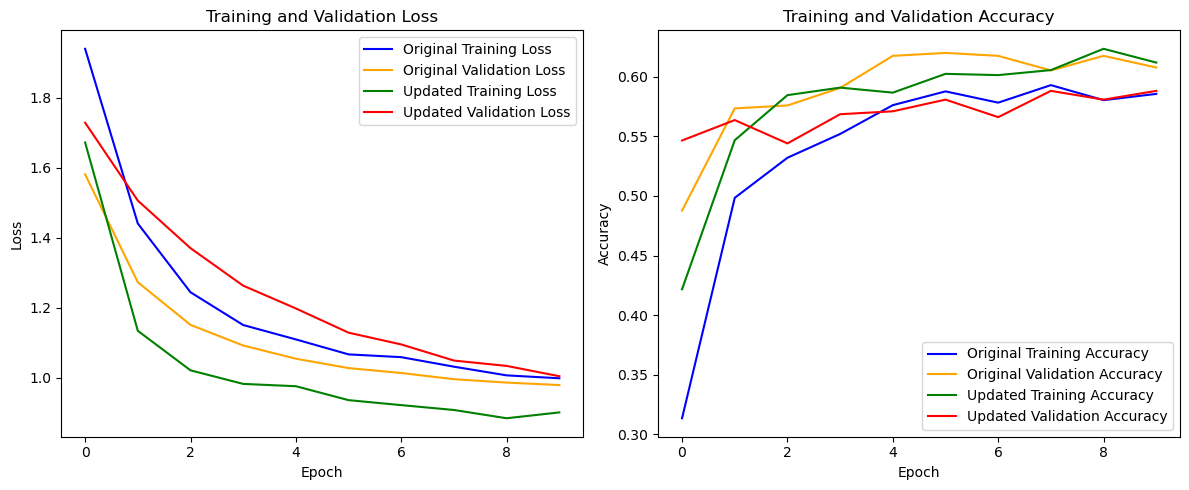

In [18]:
# Get training loss and validation loss from the history object for the updated model
training_loss_updated = history_updated.history['loss']
validation_loss_updated = history_updated.history['val_loss']

# Get training accuracy and validation accuracy from the history object for the updated model
training_accuracy_updated = history_updated.history['accuracy']
validation_accuracy_updated = history_updated.history['val_accuracy']

# Plot training loss and validation loss for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Original Training Loss', color='blue')
plt.plot(validation_loss, label='Original Validation Loss', color='orange')
plt.plot(training_loss_updated, label='Updated Training Loss', color='green')
plt.plot(validation_loss_updated, label='Updated Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy for both models
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Original Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Original Validation Accuracy', color='orange')
plt.plot(training_accuracy_updated, label='Updated Training Accuracy', color='green')
plt.plot(validation_accuracy_updated, label='Updated Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

---

### Part B

---

In [19]:
# Importing required libraries
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Specify the path to the .h5 file
file_path = "/Users/meghnarana/Downloads/Autonomous_Vehicles_SVHN_single_grey1.h5"

In [21]:
# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as hdf_file:
    # Iterate over the keys to identify datasets
    for key in hdf_file.keys():
        print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [22]:
# Load the .h5 file
file_path = "/Users/meghnarana/Downloads/Autonomous_Vehicles_SVHN_single_grey1.h5"
with h5py.File(file_path, 'r') as hdf_file:
    # Extract features and labels
    X_test = hdf_file['X_test'][:]
    X_train = hdf_file['X_train'][:]
    X_val = hdf_file['X_val'][:]
    y_test = hdf_file['y_test'][:]
    y_train = hdf_file['y_train'][:]
    y_val = hdf_file['y_val'][:]


X_train, X_test, y_train, y_test = X_train[:], X_test[:], y_train[:], y_test[:]

In [23]:
# Display the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)


The shapes appear to be consistent, with the number of samples in X_train matching the number of labels in y_train, and similarly for the testing set. Therefore, X and y are in sync.

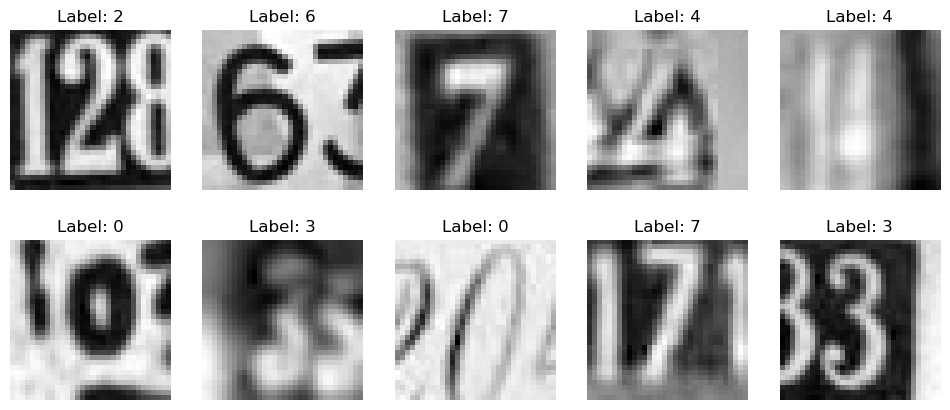

In [24]:
# Define the labels for each digit
digit_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Visualize the first 10 images in the training data
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Label: " + digit_labels[y_train[i]])
    plt.axis('off')
plt.show()

In [25]:
# Reshape the images to the appropriate shape
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Display the new shapes of the training and testing data
print("X_train shape after reshaping:", X_train.shape)
print("X_test shape after reshaping:", X_test.shape)

X_train shape after reshaping: (42000, 1024)
X_test shape after reshaping: (18000, 1024)


In [26]:
# Normalize the pixel values of the images
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [27]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the training labels and transform them
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [28]:
# Find the unique classes in the training labels
unique_classes = np.unique(y_train)

# Print the total number of classes
num_classes = len(unique_classes)
print("Total number of classes:", num_classes)

Total number of classes: 10


In [29]:
# Define the neural network architecture
def create_nn(input_shape, num_classes):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Define input shape and number of classes
input_shape = (32, 32, 1)  # Assuming grayscale images
num_classes = 10  # Number of digits

# Create the neural network model
model = create_nn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

# Reshape the input data to match the expected shape of the model
X_train_reshaped = X_train_normalized.reshape(-1, 32, 32, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 32, 32, 1)

# Define batch size and number of epochs
batch_size = 128
epochs = 20

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=2)
print("\nTest Accuracy:", test_accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)             

In [30]:
# Predict probabilities for test data
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

563/563 [==============================] - 6s 10ms/step
Test Accuracy: 0.9233333468437195

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.93      0.94      1803
           3       0.90      0.89      0.89      1719
           4       0.96      0.93      0.94      1812
           5       0.90      0.93      0.92      1768
           6       0.91      0.92      0.92      1832
           7       0.94      0.94      0.94      1808
           8       0.93      0.90      0.92      1812
           9       0.93      0.91      0.92      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000


Confusion Matrix:
[[1717   28   11    3    5    2   15    8    8   17]
 [  18 1694    7   17   25    6    8   31   12   10]
 [

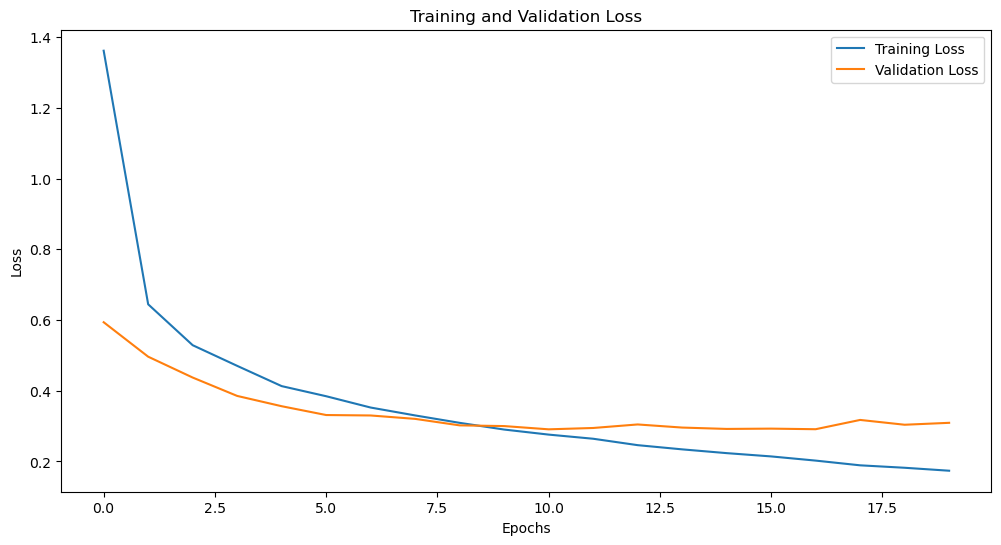

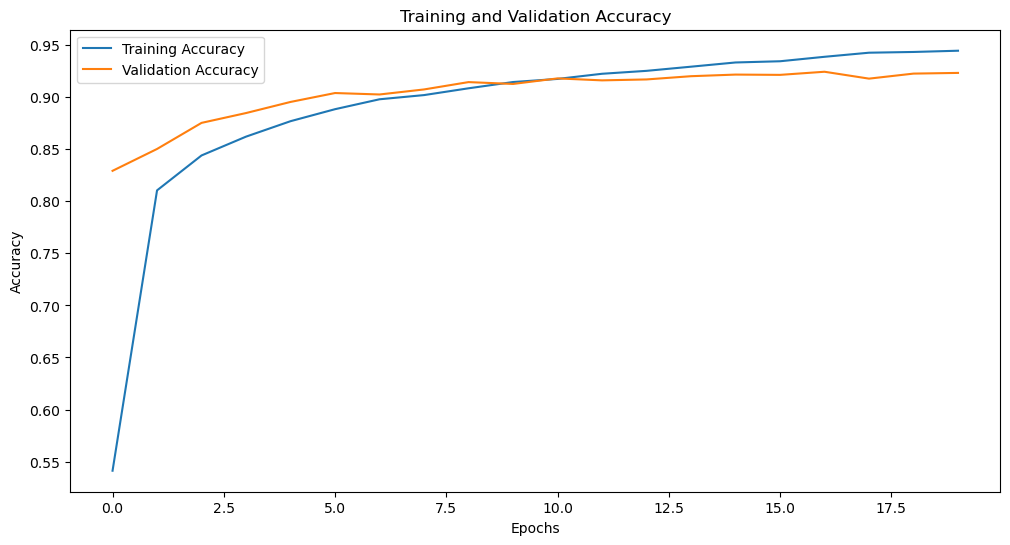

In [31]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---